# Import Dependencies

In [ ]:
!pip install tabula-py
!pip install openpyxl
!pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 51.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 75.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sweetviz as sv
import io
import requests
import tabula
import os
import warnings
warnings.filterwarnings('ignore')

# Data Imports

The insurance industry is widely recognized for its extensive application of analytics and data science methodologies. This dataset offers an opportunity to explore challenges, strategies, and influential variables within the context of insurance company data. Comprising 615 rows and 13 columns, the dataset is designed for a classification problem.

License
CC0: Public Domain

**Problem Statement**
The objective is to develop an automated, real-time loan eligibility system based on customer information provided during the online application process. Key details include gender, marital status, education, number of dependents, income, loan amount, credit history, and other factors. The challenge is to identify customer segments that qualify for loans, enabling the company to specifically target these individuals. A partial dataset has been provided for this purpose.

<table>
    <tr style="background-color: #f0f0f0;">
        <th>Gender</th>
        <th>Marital Status</th>
        <th>Education</th>
        <th>Number of Dependents</th>
        <th>Income</th>
        <th>Loan Amount</th>
        <th>Credit History</th>
        <th>Other Factors</th>
    </tr>
</table>


| Column             | Description                                              | Example Encoding                      |
|--------------------|----------------------------------------------------------|---------------------------------------|
| Loan_ID            | Unique identifier for each loan application              | numeric                               |
| Gender             | Gender of the applicant                                  | 1 for Male, 2 for Female              |
| Married            | Whether the applicant is married                         | 1 for Yes, 0 for No                   |
| Dependents         | Number of dependents the applicant has                   | 0, 1, 2, 3                            |
| Graduate           | Whether the applicant is a graduate                      | 1 for Yes, 0 for No                   |
| Self_Employed      | Whether the applicant is self-employed                   | 1 for Yes, 0 for No                   |
| ApplicantIncome    | Total income of the applicant                            | numeric                               |
| CoapplicantIncome  | Total income of the co-applicant                         | numeric                               |
| LoanAmount         | Loan amount requested by the applicant                   | numeric                               |
| Loan_Amount_Term   | Loan term in months                                      | numeric                               |
| Credit_History     | Whether the applicant has a credit history               | 1 for Yes, 0 for No                   |
| Property_Area      | Area where the property is located                       | 1 for Urban, 2 for Semiurban, 3 for Rural |
| Loan_Status        | Status of the loan application                           | Y for Approved, N for Rejected        |


In [ ]:
# load excel file
def load_excel_from_url(url: str) -> pd.DataFrame:
    response = requests.get(url)
    data = io.BytesIO(response.content)
    df = pd.read_excel(data, engine='openpyxl')
    return df

url = "https://github.com/mohwarsame273/datasets/raw/main/Zappy_Loan_Data.xlsx"

df = load_excel_from_url(url).set_index('Loan_ID')

df.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [ ]:
# check duplicates
df[df.duplicated(keep=False)]

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


In [ ]:
# load pdf
def load_pdf_tables_from_url(url: str) -> list:
    # Download the PDF file from the URL
    response = requests.get(url)

    # Extract the filename from the URL by finding the last '/'
    file_name = url.rsplit('/', 1)[-1]

    # Save the PDF file with the extracted filename
    with open(file_name, "wb") as f:
        f.write(response.content)
    
    # Load the tables from the PDF file into a list of DataFrames
    dfs = tabula.read_pdf(file_name, output_format='dataframe',
                          pages="all", multiple_tables=False)

    # Remove the temporary PDF file
    os.remove(file_name)

    return dfs

url = "https://github.com/mohwarsame273/datasets/raw/main/Loans_Database_Table.pdf"
df_pdf = load_pdf_tables_from_url(url)[0].set_index('Loan_ID')

df_pdf.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


# Data Quality - Uniqueness

In [ ]:
# check duplicated ids
df_pdf[df_pdf.duplicated(keep=False)]

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


In [ ]:
# df_loans
df_loans = pd.concat([df, df_pdf], verify_integrity=False)

df_loans.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [ ]:
# check duplicated ids
df_loans[df_loans.duplicated(keep=False)].sort_index()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1925,2,0,0,1,1,2600,1717.0,99,300,1,2,N
1925,2,0,0,1,1,2600,1717.0,99,300,1,2,N
1945,2,0,0,1,0,5417,0.0,143,480,0,1,N
1945,2,0,0,1,0,5417,0.0,143,480,0,1,N
1955,2,0,0,1,0,5000,2541.0,151,480,1,3,N
1955,2,0,0,1,0,5000,2541.0,151,480,1,3,N


# Data Quality - Profiling

In [ ]:
# data validation on the data dictionary
report = sv.analyze(df_loans)
report.show_html('report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Figure size 1000x600 with 0 Axes>

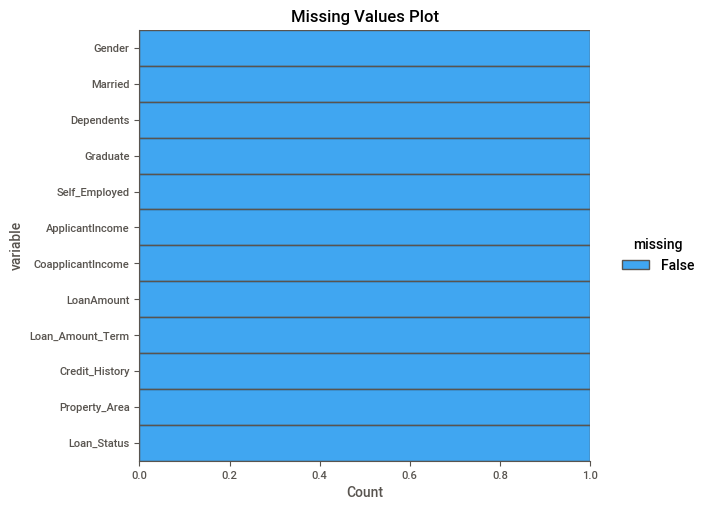

In [ ]:
# check for missing values
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_values(df: pd.DataFrame, 
                        title="Missing Values Plot"):
    plt.figure(figsize=(10, 6))

    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    plt.title(title)
    plt.show()

plot_missing_values(df_loans)


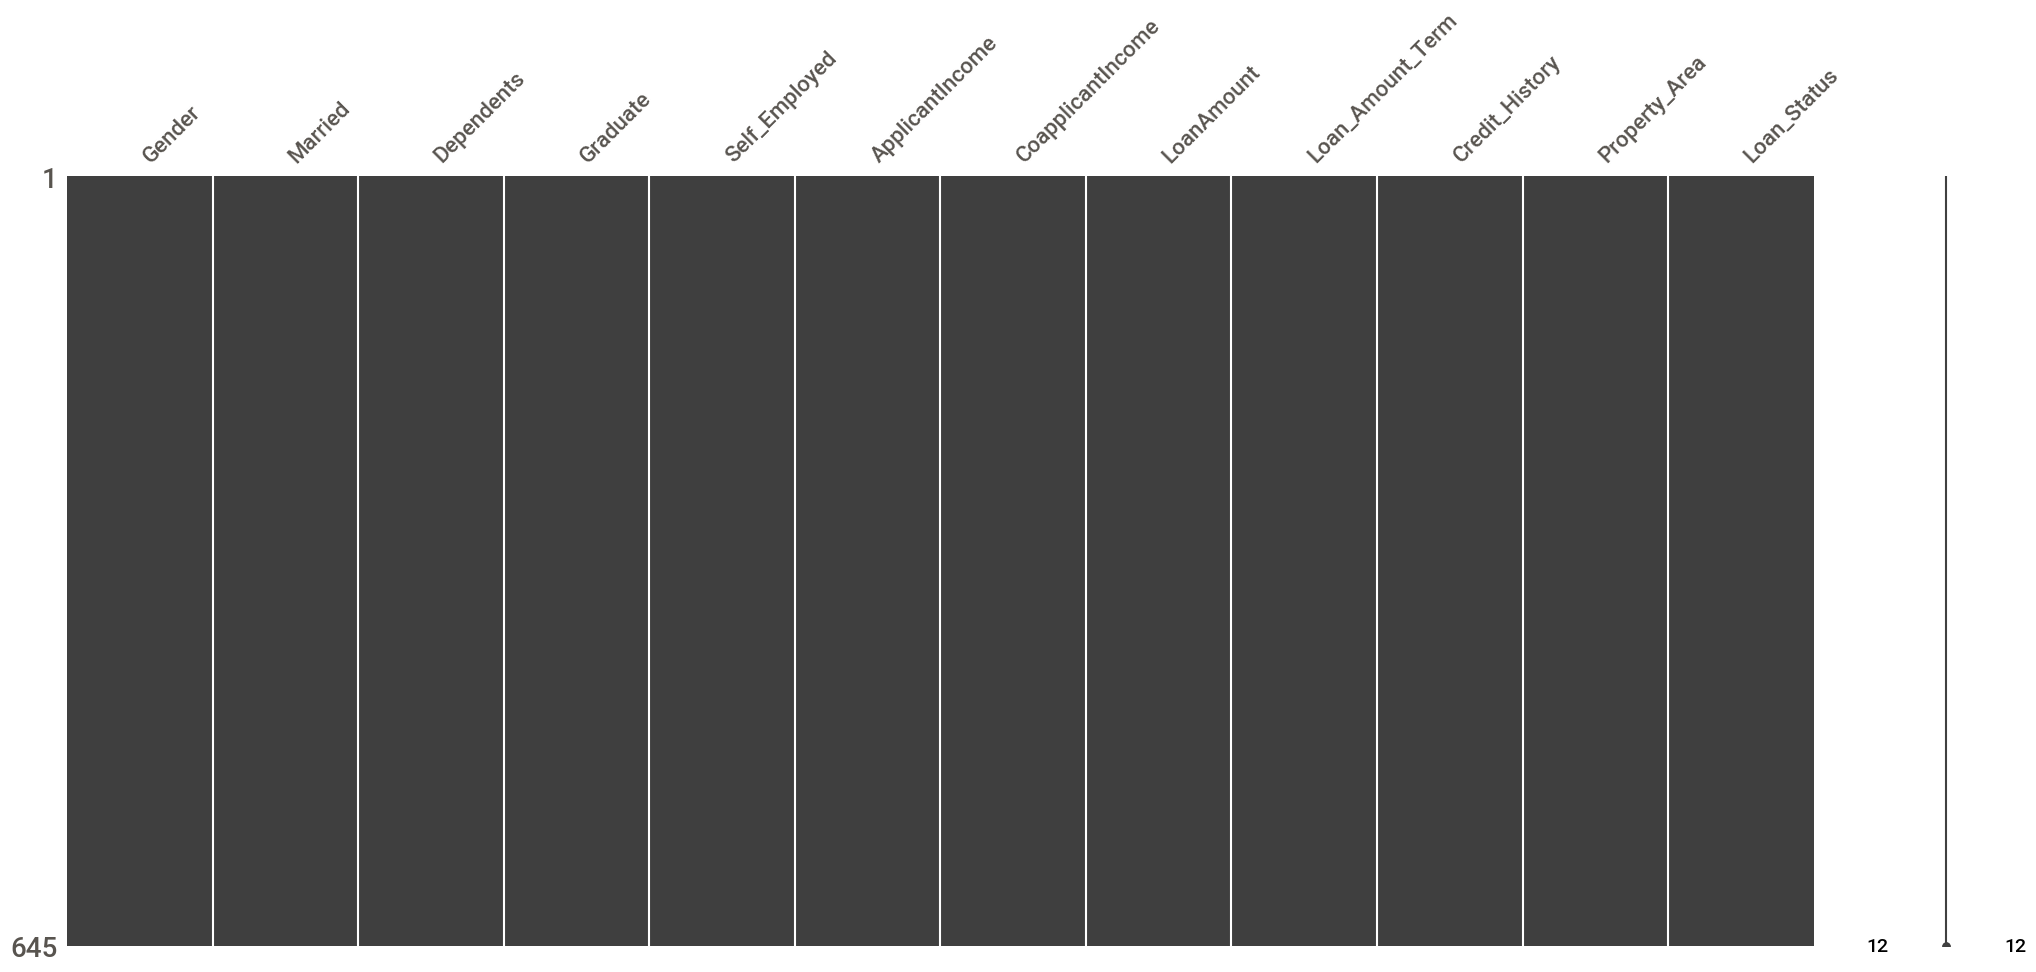

In [ ]:
import missingno as msno
msno.matrix(df_loans);

# Data Quality - Validity

In [ ]:
# data validation on the data dictionary
from pydantic import BaseModel, Field, conint, condecimal, constr

class LoanApplication(BaseModel):
    Loan_ID: int
    Gender: conint(ge=1, le=2)
    Married: conint(ge=0, le=1)
    Dependents: conint(ge=0, le=3)
    Graduate: conint(ge=0, le=1)
    Self_Employed: conint(ge=0, le=1)
    ApplicantIncome: condecimal(ge=0)
    CoapplicantIncome: condecimal(ge=0)
    LoanAmount: condecimal(ge=0)
    Loan_Amount_Term: condecimal(ge=0)
    Credit_History: conint(ge=0, le=1)
    Property_Area: conint(ge=1, le=3)
    Loan_Status: constr(regex="^[YN]$")

# Sample loan application data
loan_application_data = {
    "Loan_ID": 123456,
    "Gender": 1,
    "Married": 1,
    "Dependents": 2,
    "Graduate": 1,
    "Self_Employed": 0,
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 2000,
    "LoanAmount": 100000,
    "Loan_Amount_Term": 360,
    "Credit_History": 1,
    "Property_Area": 2,
    "Loan_Status": "Y"
}

# Validate the data using the LoanApplication Pydantic model
loan_application = LoanApplication(**loan_application_data)

print(loan_application)


Loan_ID=123456 Gender=1 Married=1 Dependents=2 Graduate=1 Self_Employed=0 ApplicantIncome=Decimal('5000') CoapplicantIncome=Decimal('2000') LoanAmount=Decimal('100000') Loan_Amount_Term=Decimal('360') Credit_History=1 Property_Area=2 Loan_Status='Y'


In [ ]:
# data validation on the data dictionary
from pydantic import ValidationError
from typing import List

# Function to validate DataFrame and return a list of failed LoanApplication objects
def validate_loan_applications(df: pd.DataFrame) -> List[LoanApplication]:
    failed_applications = []

    for index, row in df.iterrows():
        row_dict = row.to_dict()
        
        try:
            loan_application = LoanApplication(**row_dict)
        except ValidationError as e:
            print(f"Validation failed for row {index}: {e}")
            failed_applications.append(row_dict)

    return failed_applications

# Validate the entire DataFrame
failed_applications = validate_loan_applications(df_loans.reset_index())

# Print the failed loan applications or "No data quality issues" 
if not failed_applications:
    print("No data validation issues")
else:
    for application in failed_applications:
        print(f"Failed application: {application}")


No data validation issues


In [ ]:
!pip install pandas_dq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_loans.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            645 non-null    int64  
 1   Gender             645 non-null    int64  
 2   Married            645 non-null    int64  
 3   Dependents         645 non-null    int64  
 4   Graduate           645 non-null    int64  
 5   Self_Employed      645 non-null    int64  
 6   ApplicantIncome    645 non-null    int64  
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    int64  
 9   Loan_Amount_Term   645 non-null    int64  
 10  Credit_History     645 non-null    int64  
 11  Property_Area      645 non-null    int64  
 12  Loan_Status        645 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 65.6+ KB


# Pandas DQ - Check All

In [ ]:
from pandas_dq import DataSchemaChecker

schema = {
    'Loan_ID': 'int64',
    'Gender': 'int64',
    'Married': 'int64',
    'Dependents': 'int64',
    'Graduate': 'int64',
    'Self_Employed': 'int64',
    'ApplicantIncome': 'float64',
    'CoapplicantIncome': 'float64',
    'LoanAmount': 'float64',
    'Loan_Amount_Term': 'float64',
    'Credit_History': 'int64',
    'Property_Area': 'int64',
    'Loan_Status': 'object'
}

checker = DataSchemaChecker(schema)

checker.fit(df_loans.reset_index())


,column,expected_dtype,actual_dtype,data_dtype_mismatch
0,ApplicantIncome,float64,int64,Column 'ApplicantIncome' has data type 'int64'...
1,LoanAmount,float64,int64,Column 'LoanAmount' has data type 'int64' but ...
2,Loan_Amount_Term,float64,int64,Column 'Loan_Amount_Term' has data type 'int64...


DataSchemaChecker(schema={'ApplicantIncome': 'float64',
                          'CoapplicantIncome': 'float64',
                          'Credit_History': 'int64', 'Dependents': 'int64',
                          'Gender': 'int64', 'Graduate': 'int64',
                          'LoanAmount': 'float64',
                          'Loan_Amount_Term': 'float64', 'Loan_ID': 'int64',
                          'Loan_Status': 'object', 'Married': 'int64',
                          'Property_Area': 'int64', 'Self_Employed': 'int64'})

In [ ]:
# fix issues

df_fixed = checker.transform(df_loans.reset_index())

df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            645 non-null    int64  
 1   Gender             645 non-null    int64  
 2   Married            645 non-null    int64  
 3   Dependents         645 non-null    int64  
 4   Graduate           645 non-null    int64  
 5   Self_Employed      645 non-null    int64  
 6   ApplicantIncome    645 non-null    float64
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    float64
 9   Loan_Amount_Term   645 non-null    float64
 10  Credit_History     645 non-null    int64  
 11  Property_Area      645 non-null    int64  
 12  Loan_Status        645 non-null    object 
dtypes: float64(4), int64(8), object(1)
memory usage: 65.6+ KB


In [ ]:
from pandas_dq import dq_report

dq_report(df_loans.reset_index(), target=None, verbose=1)

Alert: Dropping 3 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Loan_ID,int64,0.000000,95,1002.000000,2990.000000,No issue
Gender,int64,0.000000,0,1.000000,2.000000,has 117 outliers greater than upper bound (1.0) or lower than lower bound(1.0). Cap them or remove them.
Married,int64,0.000000,0,0.000000,1.000000,No issue
Dependents,int64,0.000000,0,0.000000,3.000000,has 52 outliers greater than upper bound (2.5) or lower than lower bound(-1.5). Cap them or remove them.
Graduate,int64,0.000000,0,0.000000,1.000000,has 139 outliers greater than upper bound (1.0) or lower than lower bound(1.0). Cap them or remove them.
Self_Employed,int64,0.000000,0,0.000000,1.000000,has 83 outliers greater than upper bound (0.0) or lower than lower bound(0.0). Cap them or remove them.
ApplicantIncome,int64,0.000000,78,150.000000,81000.000000,has 54 outliers greater than upper bound (10040.0) or lower than lower bound(-1424.0). Cap them or remove them.
CoapplicantIncome,float64,0.000000,NA,0.000000,41667.000000,has 18 outliers greater than upper bound (5762.5) or lower than lower bound(-3457.5). Cap them or remove them.
LoanAmount,int64,0.000000,31,9.000000,700.000000,has 49 outliers greater than upper bound (268.125) or lower than lower bound(1.125). Cap them or remove them.
Loan_Amount_Term,int64,0.000000,1,12.000000,480.000000,has 78 outliers greater than upper bound (400.5) or lower than lower bound(292.5). Cap them or remove them.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Loan_ID,int64,0.0,95,1002.0,2990.0,No issue
Gender,int64,0.0,0,1.0,2.0,has 117 outliers greater than upper bound (1.0...
Married,int64,0.0,0,0.0,1.0,No issue
Dependents,int64,0.0,0,0.0,3.0,has 52 outliers greater than upper bound (2.5)...
Graduate,int64,0.0,0,0.0,1.0,has 139 outliers greater than upper bound (1.0...
Self_Employed,int64,0.0,0,0.0,1.0,has 83 outliers greater than upper bound (0.0)...
ApplicantIncome,int64,0.0,78,150.0,81000.0,has 54 outliers greater than upper bound (1004...
CoapplicantIncome,float64,0.0,NA,0.0,41667.0,has 18 outliers greater than upper bound (5762...
LoanAmount,int64,0.0,31,9.0,700.0,has 49 outliers greater than upper bound (268....
Loan_Amount_Term,int64,0.0,1,12.0,480.0,has 78 outliers greater than upper bound (400....
